# **Ejercicio de visualización de datos (práctica)**

##  Erwin Barriga

__[Makeover Monday](https://www.makeovermonday.co.uk/)__ ofrece un desafío semanal para reconstruir o mejorar la visualización de datos. La tarea es elegir una de las visualizaciones de datos para reconstruir o mejorarlas.

Para hacer esto:

1. Elijan un conjunto de datos de la __[lista de conjuntos de datos](https://www.makeovermonday.co.uk/data/data-sets-2020/)__. Pueden elegir un conjunto de datos reciente o uno de un año anterior (siempre y cuando les interese).
2. Descarguen los datos que eligieron.
3. Usen Python para crear una visualización atractiva e informativa usando los datos que seleccionaron.

También deben colocar su trabajo para esta tarea en GitHub, para que así todos puedan ver la increíble visualización que crearon.

Para hacer esto:

1. Creen un nuevo repositorio __[GitHub](https://github.com/)__ con un nombre informativo para la visualización o los datos. (Nota: __[aquí](https://www.wikihow.com/Create-a-Repository-on-GitHub)__ están las instrucciones en cómo hacerlo si no están seguros. Asegúrense de marcar la casilla “Inicializar este repositorio con un README”).
2. Agreguen el código al repositorio GitHub que crearon. Pueden hacerlo en Google Colab seleccionando Archivo > “Guardar una copia en GitHub”
3. Editen el README para crear una descripción informativa del ejercicio que explica el propósito de la tarea/visualización, los datos y lo que la visualización que han hecho les muestra/indica. Incluso puede que quieran incluir una imagen estática de la visualización final en README también. (Nota: README son archivos Markdown. __[Aquí](https://www.markdownguide.org/cheat-sheet)__ están los apuntes de una sintaxis de Markdown). Intenten hacer de esto lo más informativo y profesional, ya que esto es lo primero que las personas verán cuando entren a sus repositorios de GitHub.

En cuanto hayan terminado, envíen un enlace a sus repositorios de GitHub para entregar esta tarea.

In [64]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [65]:
filename = './Protein Costs.xlsx'
df = pd.read_excel(filename)
df.head()

,Protein Source,Cost per 20 Grams of Protein (US Dollars),Cost per package,Total Protein per package (g),Vegetarian?,Vegan?,Notes
0,Skim Milk,0.65,$4.29/gal,133,T,F,NaN
1,Chicken Legs (bone-in),0.65,$1.95/lb,49,F,F,Price includes bones which are inedible. Chick...
2,Peanuts,0.68,$3.79/lb,112,T,T,NaN
3,Whole Milk,0.85,$5.19/gal,123,T,F,NaN
4,Chicken Breast,0.86,$5.89/lb,139,F,F,NaN


In [66]:
# Corregir nombre columna
df.rename(columns={"Vegetarian? " : "Vegetarian?"}, inplace=True)

### Comparación de la densidad proteínica versus distintos tipos de proteina

In [67]:
vis = df.sort_values("Total Protein per package (g)", ascending=False)

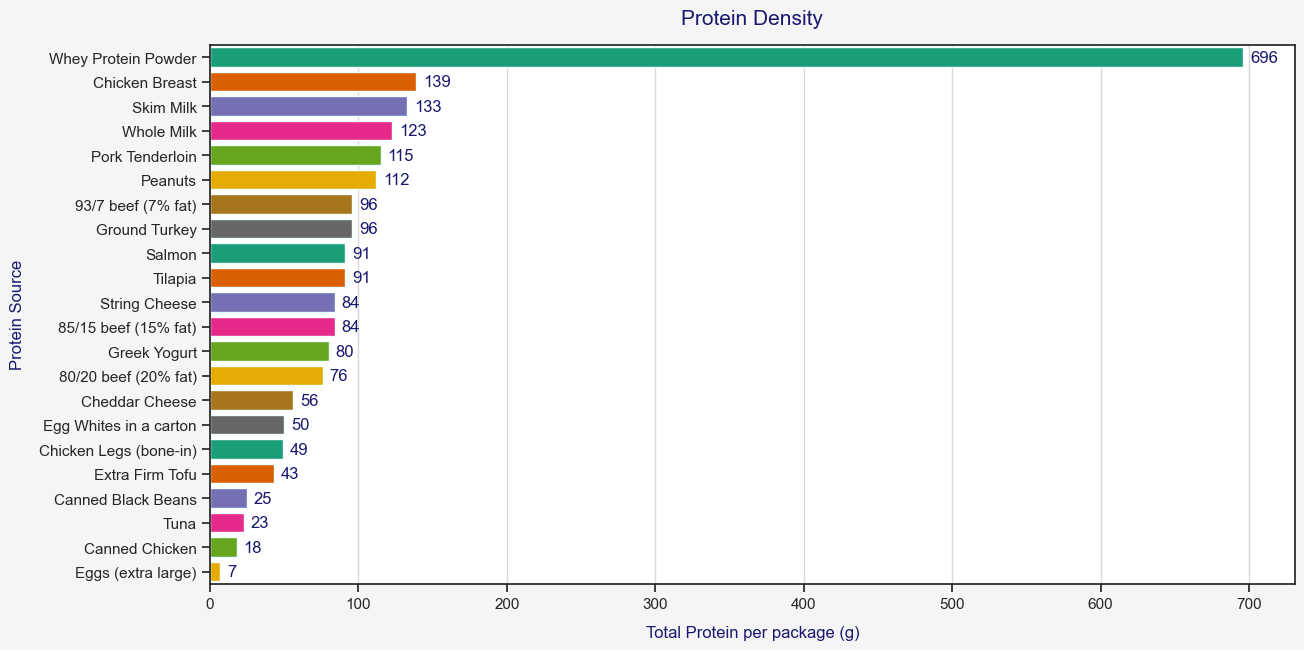

In [68]:
sns.set()
sns.set_context("notebook")
sns.set_style("ticks", {'axes.grid':True, 'figure.facecolor':'whitesmoke', 'grid.color':'.85', 'text.color':'midnightblue'})
plt.figure(figsize=(14,7))
ax = sns.barplot(data=vis, y="Protein Source", x="Total Protein per package (g)", palette="Dark2", edgecolor='azure', saturation=1)
plt.ylabel('Protein Source', {"fontsize":12}, labelpad=10)
plt.xlabel('Total Protein per package (g)', {"fontsize":12}, labelpad=10)
ax.bar_label(ax.containers[0], padding=5)
plt.title("Protein Density", {"fontsize":15}, pad=15);

### Comparación del costo de 20 gr de proteina según su fuente y tipo de dieta

Creación de una columna "Dieta" producto de la operación lógica entre las columnas de dieta vegetariana y vegana:

In [69]:
df.loc[df["Vegetarian?"] == "F", "Vegetarian?"] = False
df.loc[df["Vegetarian?"] == "T", "Vegetarian?"] = True
df.loc[df["Vegan?"] == "F", "Vegan?"] = False
df.loc[df["Vegan?"] == "T", "Vegan?"] = True
df.head()

,Protein Source,Cost per 20 Grams of Protein (US Dollars),Cost per package,Total Protein per package (g),Vegetarian?,Vegan?,Notes
0,Skim Milk,0.65,$4.29/gal,133,True,False,NaN
1,Chicken Legs (bone-in),0.65,$1.95/lb,49,False,False,Price includes bones which are inedible. Chick...
2,Peanuts,0.68,$3.79/lb,112,True,True,NaN
3,Whole Milk,0.85,$5.19/gal,123,True,False,NaN
4,Chicken Breast,0.86,$5.89/lb,139,False,False,NaN


In [70]:
# Función que devuelve el tipo de dieta según los valores de Vegetarian? y Vegan?	
def dietName(data):
  if data["Vegetarian?"] and data["Vegan?"]:
    return "Vegetarian & Vegan"
  elif data["Vegetarian?"] and not data["Vegan?"]:
    return "Vegetarian"
  elif not data["Vegetarian?"] and data["Vegan?"]:
    return "Vegan"
  else:
    return "General"

In [71]:
df["Diet?"] = df.apply( lambda x: dietName(x), axis=1 )
df.head()

,Protein Source,Cost per 20 Grams of Protein (US Dollars),Cost per package,Total Protein per package (g),Vegetarian?,Vegan?,Notes,Diet?
0,Skim Milk,0.65,$4.29/gal,133,True,False,NaN,Vegetarian
1,Chicken Legs (bone-in),0.65,$1.95/lb,49,False,False,Price includes bones which are inedible. Chick...,General
2,Peanuts,0.68,$3.79/lb,112,True,True,NaN,Vegetarian & Vegan
3,Whole Milk,0.85,$5.19/gal,123,True,False,NaN,Vegetarian
4,Chicken Breast,0.86,$5.89/lb,139,False,False,NaN,General


In [72]:
vis = df.sort_values("Cost per 20 Grams of Protein (US Dollars)", ascending=False)

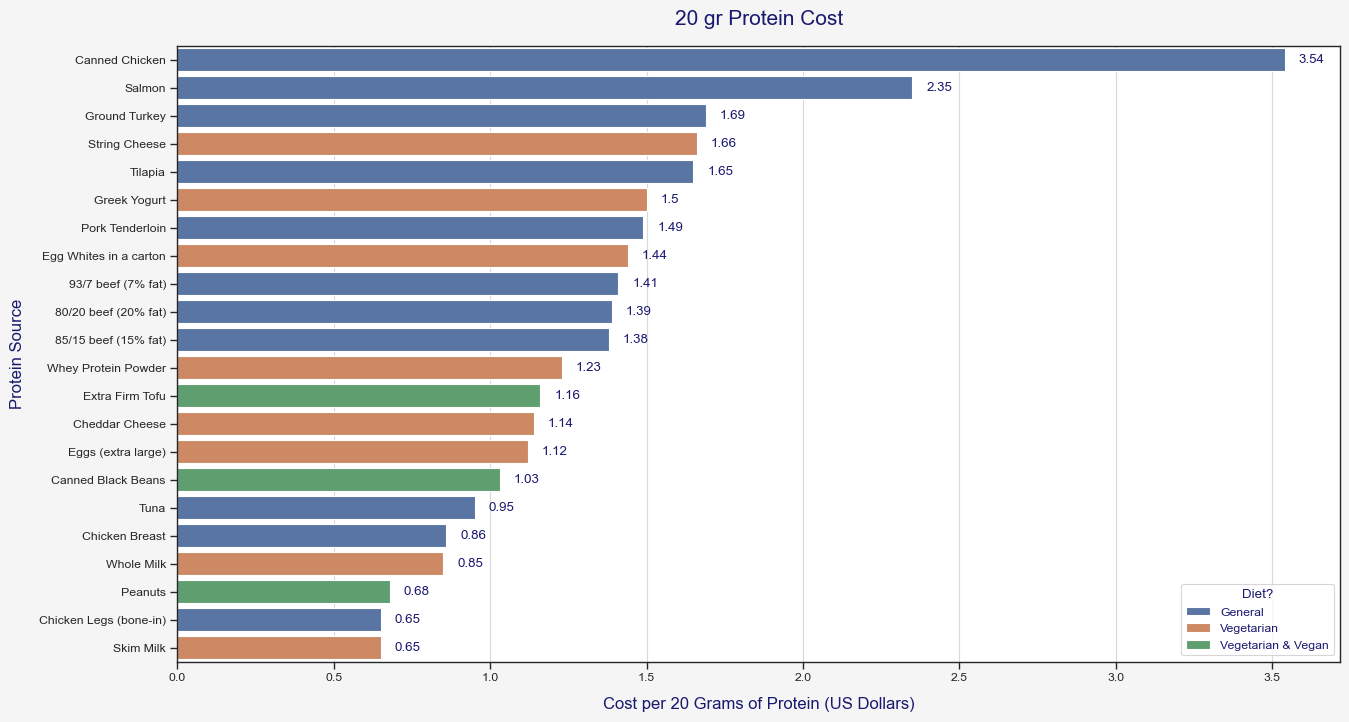

In [74]:
sns.set()
sns.set_context("paper")
sns.set_style("ticks", {'axes.grid':True, 'figure.facecolor':'whitesmoke', 'grid.color':'.85', 'text.color':'midnightblue'})
plt.figure(figsize=(15,8))
ax = sns.barplot(data=vis, y="Protein Source", x="Cost per 20 Grams of Protein (US Dollars)", hue="Diet?", dodge =False)
plt.ylabel('Protein Source', {"fontsize":12}, labelpad=10)
plt.xlabel('Cost per 20 Grams of Protein (US Dollars)', {"fontsize":12}, labelpad=10)
for bars in ax.containers:
  ax.bar_label(bars, padding=10)
plt.title("20 gr Protein Cost", {"fontsize":15}, pad=15);